In [ ]:
# matplotlib imports are used to plot confusion matrices for the classifier
import matplotlib.cm as cm 
import matplotlib.pyplot as plt 

import numpy as np

# import feature extraction methods from sklearn
from sklearn.feature_extraction.text import CountVectorizer

# import classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

# import different metrics to evaluate the classifiers
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn import metrics

# **Classification**

Classification is not specific to natural language processing. However, there are many tasks in NLP that require categorization of text into predefined categories. One common example of NLP classification is sentiment analysis, where the goal is to classify a given text as having a positive, negative, or neutral sentiment. Other examples include topic classification, intent detection, and named entity recognition. The success of a classification model depends on the quality of the training data and the choice of algorithm used. Popular algorithms for NLP classification include support vector machines (SVMs), random forests, XGBoost, and neural networks.

## What does the data look like for classification?

As with other tasks, we cannot just pass plain text for classification. We need to extract features that will be useful to performing the classification. Here are some example features:

*   Bag-of-words
*   TF-IDF
*   Distributed representations

Let's use BOW for spam classification. We will be using a dataset of spam and non-spam (ham) SMS messages from the [UCI Machine Learning Dataset Repository](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection).

In [ ]:
import pandas as pd

df = pd.read_csv('SMSSpamCollection', sep='\t', header=None)
df.head(10)

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
# Replace 'ham' with 1 and 'spam' with 0
df.iloc[:,0] = df.iloc[:,0].replace({'ham': 0, 'spam': 1})
df.head(10)

,0,1
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...
6,0,Even my brother is not like to speak with me. ...
7,0,As per your request 'Melle Melle (Oru Minnamin...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...


Let's make a BOW representation and then we will make a distributed representation using SpaCy and tok2vec with the same dataset.

In [ ]:
X = df.iloc[:,1]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)

vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
# transform testing data (using training data's features)
X_test_dtm = vect.transform(X_test)
print(X_train_dtm.shape, X_test_dtm.shape)
#print(np.sum(X_test_dtm.toarray()[100] == 1))

(4736, 7947) (836, 7947)


## **Naive Bayes**

In [ ]:
nb = MultinomialNB() # instantiate a Multinomial Naive Bayes model
nb.fit(X_train_dtm, y_train) # train the model
y_pred_class = nb.predict(X_test_dtm) # make class predictions for X_test_dtm

If you want to see more options for different classifiers, check out the [One Pipeline, Many Classifiers notebook](https://github.com/practical-nlp/practical-nlp-code/blob/master/Ch4/01_OnePipeline_ManyClassifiers.ipynb), or look at samples from [scikit-learn documentation](https://scikit-learn.org/stable/supervised_learning.html) to see more examples.

### Evaluating the Results

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Generate a classification report with many metrics
print(classification_report(y_test, y_pred_class))
cm = confusion_matrix(y_test, y_pred_class)
print(cm)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       723
           1       0.98      0.94      0.96       113

    accuracy                           0.99       836
   macro avg       0.99      0.97      0.98       836
weighted avg       0.99      0.99      0.99       836

[[721   2]
 [  7 106]]


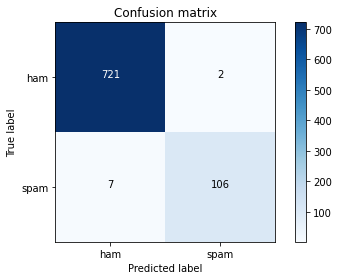

In [ ]:
#visualize the confusion matrix
import itertools

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

classes = ['ham', 'spam']

tick_marks = np.arange(len(classes))

ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    ax.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
ax.set_title('Confusion matrix')
fig.tight_layout()

plt.show()

**Exercise: Try going through this pipeline by swapping in Spacy tok2vec representations and compare the performance of using Gaussian Naive Bayes.**

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")
X_train_spacy = X_train.apply(lambda text: nlp(text).vector)
X_test_spacy = X_test.apply(lambda text: nlp(text).vector)

In [ ]:
np.vstack(X_train_spacy)

array([[ 0.50640994,  0.01415183,  0.01943183, ..., -0.29909155,
         1.0719286 ,  0.60781306],
       [ 0.3459842 , -0.11695512,  0.1375968 , ...,  0.26618123,
         0.19894415,  0.11863975],
       [ 0.15374273,  0.8807399 ,  0.6460741 , ...,  0.0345586 ,
         0.40134543, -0.07701059],
       ...,
       [ 0.20721833, -0.27074963, -0.00988966, ...,  0.51226026,
         0.64474887,  0.49095714],
       [ 0.14024945,  0.07209091,  0.1784216 , ...,  0.40371057,
         0.05411024,  0.18228006],
       [ 0.06003836,  0.24828297,  0.48635587, ...,  0.6251931 ,
         0.28403485,  0.23879567]], dtype=float32)

## **Side note: Oversampling**

In order to create a more balanced dataset oversampling is often performed. 

In [ ]:
#!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import RandomOverSampler

# Instantiate sampling object
ros = RandomOverSampler(sampling_strategy='minority')

# Fit RandomOverSampler to the training data
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
print(X_resampled.shape, y_resampled.shape)

ValueError: ignored

Notice that the oversampling is only being performed on the training set. Also note that if hyperparameter tuning is needed (doing some form of cross-validation) then oversampling may need to be incorporated into [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) with scikit-learn.